In [1]:
!pip install matplotlib
!pip install numpy

  Using cached matplotlib-3.9.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp313-cp313-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.0-cp313-cp313-macosx_10_13_universal2.whl.metadata (164 kB)
  Using cached kiwisolver-1.4.7-cp313-cp313-macosx_11_0_arm64.whl.metadata (6.3 kB)
  Using cached numpy-2.1.3-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached pillow-11.0.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.9.2-cp313-cp313-macosx_11_0_arm64.whl (7.8 MB)
Using cached contourpy-1.3.1-cp313-cp313-macosx_11_0_arm64.whl (255 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.55.0-cp313-cp313-macosx_10_13_universal2.whl (2.8 MB)
Using cached kiwisolver-1.4.7-cp313-cp313-macosx_11_0_arm64.whl (63 kB)
Using cached numpy-2.1

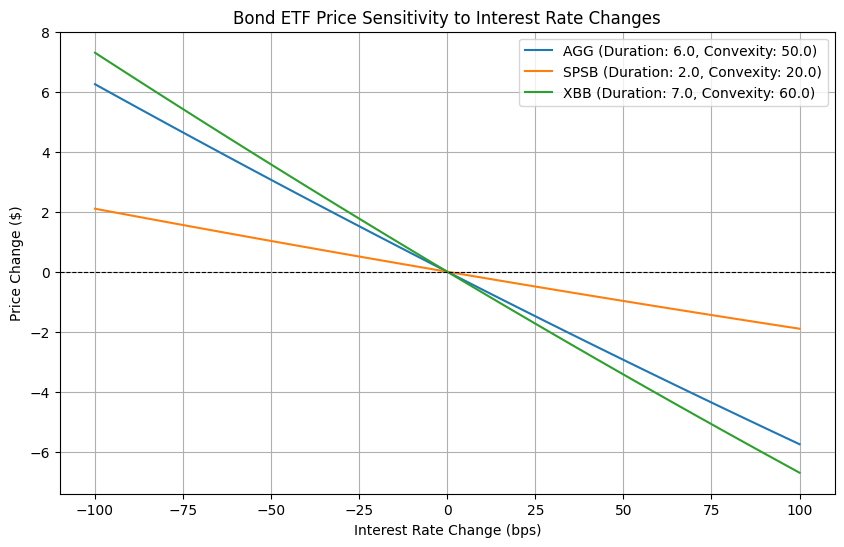

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define bond ETF characteristics: [duration, convexity, current price]
etfs = {
    "AGG": {"duration": 6.0, "convexity": 50.0, "price": 100},
    "SPSB": {"duration": 2.0, "convexity": 20.0, "price": 100},
    "XBB": {"duration": 7.0, "convexity": 60.0, "price": 100},
}

# Simulate interest rate changes (in basis points)
rate_changes = np.linspace(-100, 100, 50)  # From -100 bps to +100 bps

# Function to calculate price change due to interest rate movement
def price_change(price, duration, convexity, delta_rate):
    rate = delta_rate / 10000  # Convert basis points to decimal
    return price * (-duration * rate + 0.5 * convexity * (rate**2))

# Calculate price changes for each ETF
price_changes = {etf: [] for etf in etfs}
for etf, params in etfs.items():
    for delta_rate in rate_changes:
        price_changes[etf].append(
            price_change(params["price"], params["duration"], params["convexity"], delta_rate)
        )

# Plot the results
plt.figure(figsize=(10, 6))
for etf, changes in price_changes.items():
    plt.plot(rate_changes, changes, label=f"{etf} (Duration: {etfs[etf]['duration']}, Convexity: {etfs[etf]['convexity']})")

plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title("Bond ETF Price Sensitivity to Interest Rate Changes")
plt.xlabel("Interest Rate Change (bps)")
plt.ylabel("Price Change ($)")
plt.legend()
plt.grid()
plt.show()

In [3]:
def calculate_duration_and_convexity(cash_flows, times, ytm, current_price):
    """
    Calculates Modified Duration and Convexity for a bond or ETF.
    
    Parameters:
    - cash_flows: List of cash flows (coupon payments and principal).
    - times: List of times (in years) for the cash flows.
    - ytm: Yield to maturity (as a decimal).
    - current_price: Current price or NAV of the bond/ETF.
    
    Returns:
    - mod_duration: Modified Duration (in years).
    - convexity: Convexity (dimensionless).
    """
    # Discount factors for each cash flow
    discount_factors = [(1 + ytm)**t for t in times]
    # Present Value (PV) of cash flows
    pv_cash_flows = [cf / df for cf, df in zip(cash_flows, discount_factors)]
    
    # Calculate Macaulay Duration
    mac_duration = sum(t * pv for t, pv in zip(times, pv_cash_flows)) / sum(pv_cash_flows)
    # Convert Macaulay Duration to Modified Duration
    mod_duration = mac_duration / (1 + ytm)
    
    # Calculate Convexity
    convexity = sum(pv * t * (t + 1) for pv, t in zip(pv_cash_flows, times)) / (current_price * (1 + ytm)**2)
    
    return mod_duration, convexity

In [4]:
# Parameters for AGG
coupon_rate = 3.43 / 100  # 3.43% annual coupon rate
ytm = 4.85 / 100  # 4.85% yield to maturity
face_value = 100  # Assume a $100 face value
weighted_avg_maturity = 8.31  # Weighted average maturity in years
current_price = 97.63  # Current NAV as price

# Generate cash flows for the bond based on coupon payments and face value at maturity
cash_flows = [coupon_rate * face_value] * int(weighted_avg_maturity - 1) + [coupon_rate * face_value + face_value]
times = list(range(1, len(cash_flows) + 1))  # Time periods

# Calculate Modified Duration and Convexity
mod_duration, convexity = calculate_duration_and_convexity(cash_flows, times, ytm, current_price)

# Print Results
print(f"Modified Duration: {mod_duration:.2f} years")
print(f"Convexity: {convexity:.2f}")

Modified Duration: 6.75 years
Convexity: 51.65


In [5]:
# Define parameters for SPSB
coupon_rate_spsb = 3.70 / 100  # 3.70% annual coupon rate
ytm_spsb = 4.86 / 100  # 4.86% yield to maturity
face_value_spsb = 100  # Assume a $100 face value
weighted_avg_maturity_spsb = 1.92  # Weighted average maturity in years
current_price_spsb = 98.12  # Current NAV as price

# Generate cash flows for the bond based on coupon payments and face value at maturity
cash_flows_spsb = [coupon_rate_spsb * face_value_spsb] * int(weighted_avg_maturity_spsb - 1) + [
    coupon_rate_spsb * face_value_spsb + face_value_spsb
]
times_spsb = list(range(1, len(cash_flows_spsb) + 1))  # Time periods

# Calculate Modified Duration and Convexity for SPSB using the reusable function
mod_duration_spsb, convexity_spsb = calculate_duration_and_convexity(cash_flows_spsb, times_spsb, ytm_spsb, current_price_spsb)

# Print Results
print(f"Modified Duration: {mod_duration_spsb:.2f} years")
print(f"Convexity: {convexity_spsb:.2f}")

Modified Duration: 0.95 years
Convexity: 1.83


In [6]:
# Define parameters for XBB
coupon_rate_xbb = 3.34 / 100  # 3.34% annual coupon rate
ytm_xbb = 3.74 / 100  # 3.74% yield to maturity
face_value_xbb = 100  # Assume a $100 face value
weighted_avg_maturity_xbb = 10.09  # Weighted average maturity in years
current_price_xbb = 28.25  # Current NAV as price

# Generate cash flows for the bond based on coupon payments and face value at maturity
cash_flows_xbb = [coupon_rate_xbb * face_value_xbb] * int(weighted_avg_maturity_xbb - 1) + [
    coupon_rate_xbb * face_value_xbb + face_value_xbb
]
times_xbb = list(range(1, len(cash_flows_xbb) + 1))  # Time periods

# Calculate Modified Duration and Convexity for XBB using the reusable function
mod_duration_xbb, convexity_xbb = calculate_duration_and_convexity(cash_flows_xbb, times_xbb, ytm_xbb, current_price_xbb)

# Print Results
print(f"Modified Duration: {mod_duration_xbb:.2f} years")
print(f"Convexity: {convexity_xbb:.2f}")

Modified Duration: 8.33 years
Convexity: 287.10


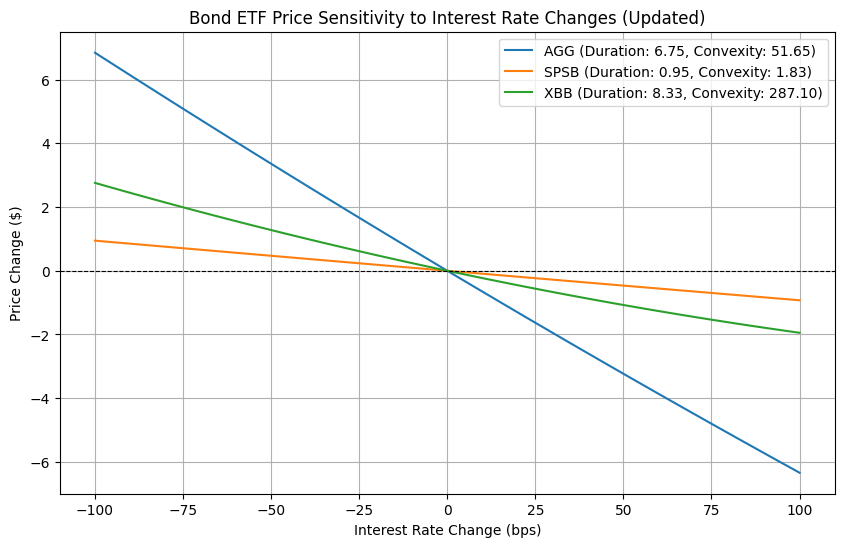

In [7]:
# Update ETF data with the newly calculated duration and convexity values
etfs_updated = {
    "AGG": {"duration": mod_duration, "convexity": convexity, "price": current_price},
    "SPSB": {"duration": mod_duration_spsb, "convexity": convexity_spsb, "price": current_price_spsb},
    "XBB": {"duration": mod_duration_xbb, "convexity": convexity_xbb, "price": current_price_xbb},
}

# Calculate price changes for each ETF with updated values
price_changes_updated = {etf: [] for etf in etfs_updated}
for etf, params in etfs_updated.items():
    for delta_rate in rate_changes:
        price_changes_updated[etf].append(
            price_change(params["price"], params["duration"], params["convexity"], delta_rate)
        )

# Plot the updated results
plt.figure(figsize=(10, 6))
for etf, changes in price_changes_updated.items():
    plt.plot(rate_changes, changes, label=f"{etf} (Duration: {etfs_updated[etf]['duration']:.2f}, Convexity: {etfs_updated[etf]['convexity']:.2f})")

plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title("Bond ETF Price Sensitivity to Interest Rate Changes (Updated)")
plt.xlabel("Interest Rate Change (bps)")
plt.ylabel("Price Change ($)")
plt.legend()
plt.grid()
plt.show()

In [8]:
def calculate_portfolio_duration_convexity(weights, etfs):
    """
    Calculates the weighted average duration and convexity of a portfolio.
    
    Parameters:
    - weights: A dictionary containing the percentage weights of each ETF in the portfolio.
    - etfs: A dictionary with duration and convexity values for each ETF.
    
    Returns:
    - portfolio_duration: Weighted average duration of the portfolio.
    - portfolio_convexity: Weighted average convexity of the portfolio.
    """
    portfolio_duration = sum(weights[etf] * etfs[etf]["duration"] for etf in etfs)
    portfolio_convexity = sum(weights[etf] * etfs[etf]["convexity"] for etf in etfs)
    return portfolio_duration, portfolio_convexity

# Example portfolio weights (as percentages)
portfolio_weights = {
    "AGG": 0.5,
    "SPSB": 0.5,
    "XBB": 0.0
}

# Calculate portfolio duration and convexity
portfolio_duration, portfolio_convexity = calculate_portfolio_duration_convexity(portfolio_weights, etfs_updated)

# Print Results
print(f"Portfolio Average Duration: {portfolio_duration:.2f} years")
print(f"Portfolio Average Complexity: {portfolio_convexity:.2f}")

Portfolio Average Duration: 3.85 years
Portfolio Average Complexity: 26.74


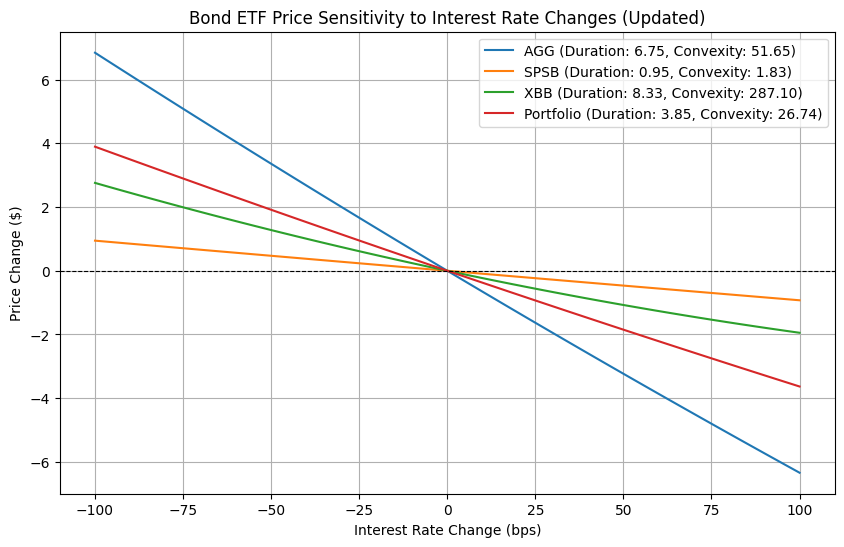

In [9]:
# Can you graph the price sensitivity of the portfolio to interest rate changes?
# Calculate price changes for the portfolio
portfolio_price_changes = []
for delta_rate in rate_changes:
    price_change_portfolio = sum(
        weights * price_change(etfs_updated[etf]["price"], etfs_updated[etf]["duration"], etfs_updated[etf]["convexity"], delta_rate)
        for etf, weights in portfolio_weights.items()
    )
    portfolio_price_changes.append(price_change_portfolio)

# Plot the results for the portfolio
plt.figure(figsize=(10, 6))
# Plot updated ETF price changes
for etf, changes in price_changes_updated.items():
    plt.plot(rate_changes, changes, label=f"{etf} (Duration: {etfs_updated[etf]['duration']:.2f}, Convexity: {etfs_updated[etf]['convexity']:.2f})")
plt.plot(rate_changes, portfolio_price_changes, label=f"Portfolio (Duration: {portfolio_duration:.2f}, Convexity: {portfolio_convexity:.2f})")

plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title("Bond ETF Price Sensitivity to Interest Rate Changes (Updated)")
plt.xlabel("Interest Rate Change (bps)")
plt.ylabel("Price Change ($)")
plt.legend()
plt.grid()
plt.show()


In [10]:
# Reported Values from BlackRock and State Street 

# AGG
# Duration: 5.92
# Convexity: 0.56

# SPSB
# Duration: 1.78
# Convexity: N/A

# XBB
# Duration: 7.30
# Convexity N/A

In [11]:
# Next Steps

# Refine calculations to include more accurate cash flow projections
# Graph duration and convexity for other ETFs of interest
# Chart other potential scenarios and stress tests (bull, bear, base) for the portfolio